# Definitive Pipeline: EDA and Comparative Clustering Analysis for Motivation Profiles

**Objective:** Perform an end-to-end analysis to segment students from the MAMBA research group. This notebook is divided into two main parts:
1. **Exploratory Data Analysis (EDA):** To understand distributions, relationships, and fundamentally justify the need for a clustering approach by demonstrating the existence of heterogeneity in the population.
2. **Comparative Clustering Analysis:** To apply 5 clustering algorithms, evaluate them quantitatively with multiple metrics, and qualitatively through interpretation of the resulting profiles.

## Part 1: Exploratory Data Analysis (EDA) - Why Clustering?

Before grouping, we must understand the data. If all students were similar, an average analysis would suffice. The objective of this EDA is to demonstrate that different patterns of behavior and motivation exist, making segmentation (clustering) a valuable approach.

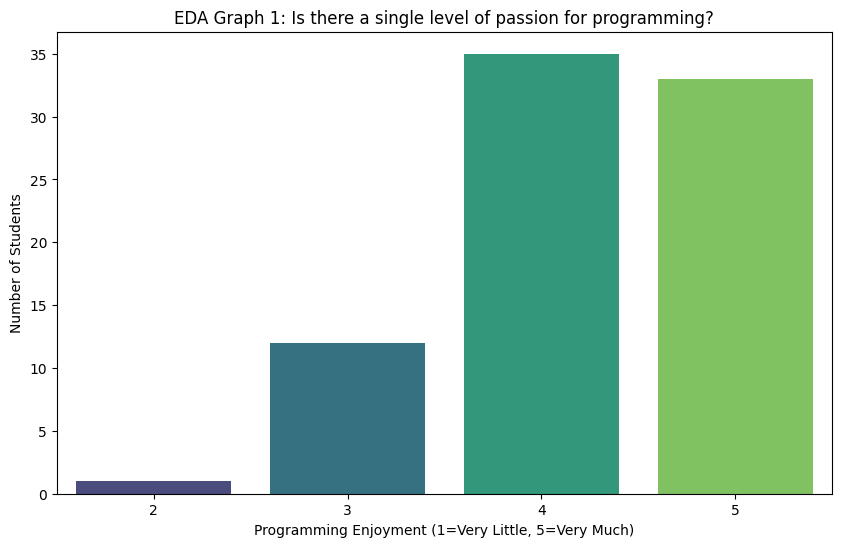

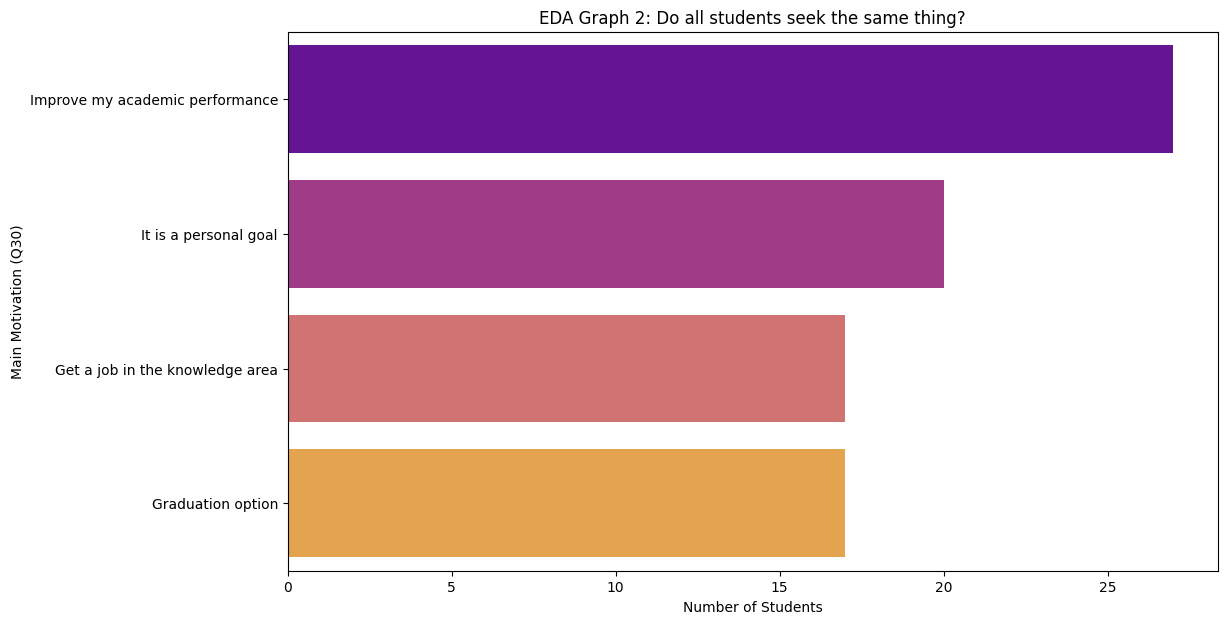

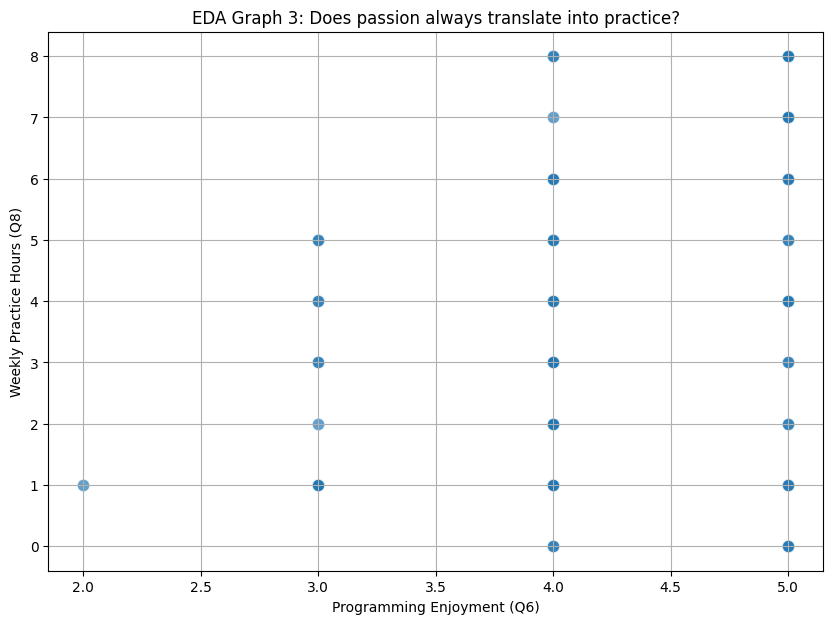

In [4]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# Load data
file_path = 'RespuestasSemillero.xlsx'
df = pd.read_excel(file_path)

# Graph 1: Distribution of Programming Enjoyment (Q6)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Q6', palette='viridis')
plt.title('EDA Graph 1: Is there a single level of passion for programming?')
plt.xlabel('Programming Enjoyment (1=Very Little, 5=Very Much)')
plt.ylabel('Number of Students')
plt.show()

# Graph 2: Main Motivations for Joining the Research Group (Q30)
plt.figure(figsize=(12, 7))
sns.countplot(data=df, y='Q30', palette='plasma', order = df['Q30'].value_counts().index)
plt.title('EDA Graph 2: Do all students seek the same thing?')
plt.xlabel('Number of Students')
plt.ylabel('Main Motivation (Q30)')
plt.show()

# Graph 3: Relationship between Programming Enjoyment and Practice Hours
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Q6', y='Q8', alpha=0.7, s=80)
plt.title('EDA Graph 3: Does passion always translate into practice?')
plt.xlabel('Programming Enjoyment (Q6)')
plt.ylabel('Weekly Practice Hours (Q8)')
plt.grid(True)
plt.show()

### EDA Conclusion
The previous graphs demonstrate that the student population is not homogeneous. Different motivations, passion levels, and study habits exist. An average analysis would hide this richness. Therefore, **a clustering approach is justified** to formally identify and characterize these subgroups.

## Part 2: Data Preparation and Comparative Clustering Analysis

Data ready for clustering.
--- Running K-Means ---


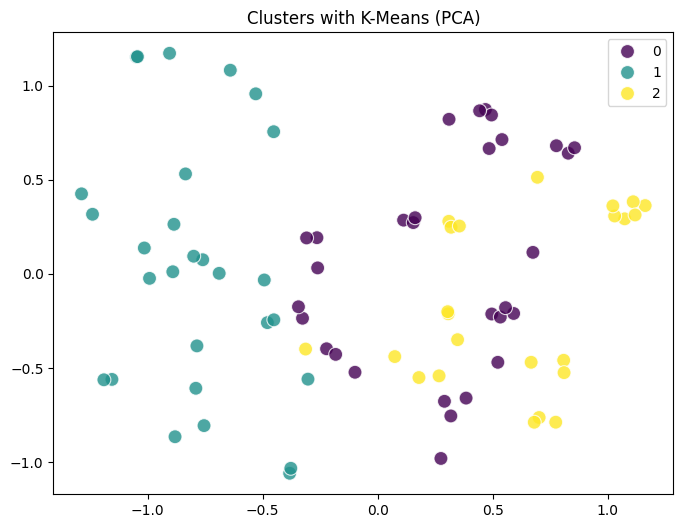

--- Running Agglomerative ---


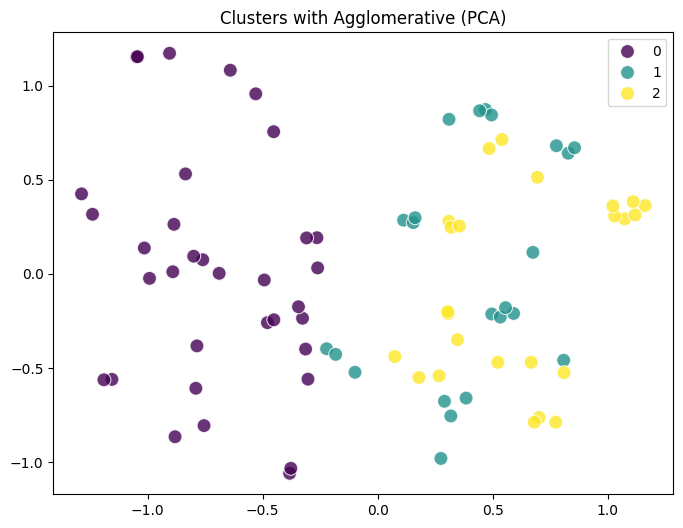

--- Running GMM ---


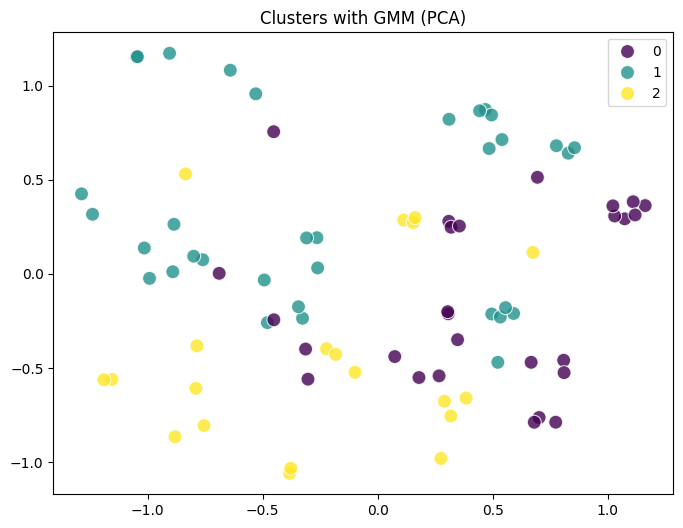

--- Running Spectral ---


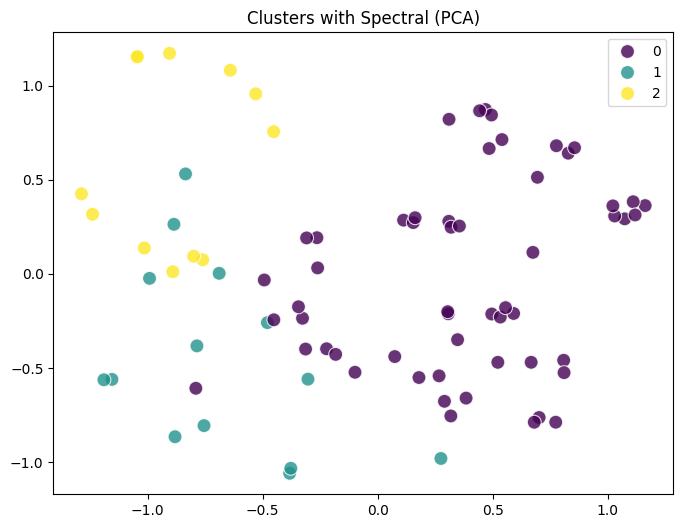

--- Running DBSCAN ---


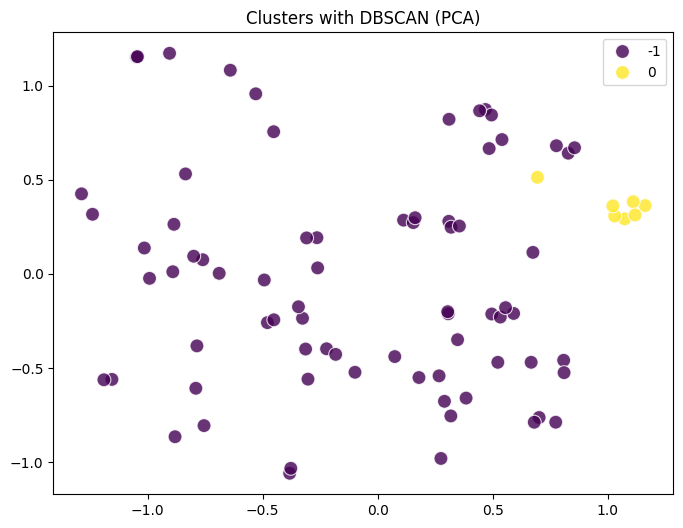

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# Select features, encode and scale
features_for_clustering = ['Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q23', 'Q25', 'Q30', 'Q31']
df_motivation = df[features_for_clustering].copy()
df_processed = pd.get_dummies(df_motivation, columns=['Q10', 'Q30', 'Q31'])
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_processed)

# PCA for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

print("Data ready for clustering.")

# Dictionary to store models and results
results = {}

# --- Algorithms ---
n_clusters = 3 # Based on EDA
models = {
    'K-Means': KMeans(n_clusters=n_clusters, random_state=42, n_init=10),
    'Agglomerative': AgglomerativeClustering(n_clusters=n_clusters),
    'GMM': GaussianMixture(n_components=n_clusters, random_state=42),
    'Spectral': SpectralClustering(n_clusters=n_clusters, random_state=42, affinity='nearest_neighbors'),
    'DBSCAN': DBSCAN(eps=1.2, min_samples=5)
}

for name, model in models.items():
    print(f'--- Running {name} ---')
    labels = model.fit_predict(data_scaled)
    df[f'{name}_Cluster'] = labels

    # Calculate metrics (only if valid clusters were found)
    if len(np.unique(labels)) > 1:
        sil = silhouette_score(data_scaled, labels)
        cal = calinski_harabasz_score(data_scaled, labels)
        dav = davies_bouldin_score(data_scaled, labels)
        results[name] = {'Silhouette': sil, 'Calinski-Harabasz': cal, 'Davies-Bouldin': dav, 'Labels': labels}
    else:
        results[name] = {'Silhouette': -1, 'Calinski-Harabasz': -1, 'Davies-Bouldin': -1, 'Labels': labels}

    # PCA Visualization
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=labels, palette='viridis', s=100, alpha=0.8)
    plt.title(f'Clusters with {name} (PCA)')
    plt.show()

## Part 3: Quantitative Comparison and Final Conclusion (Adjusted)

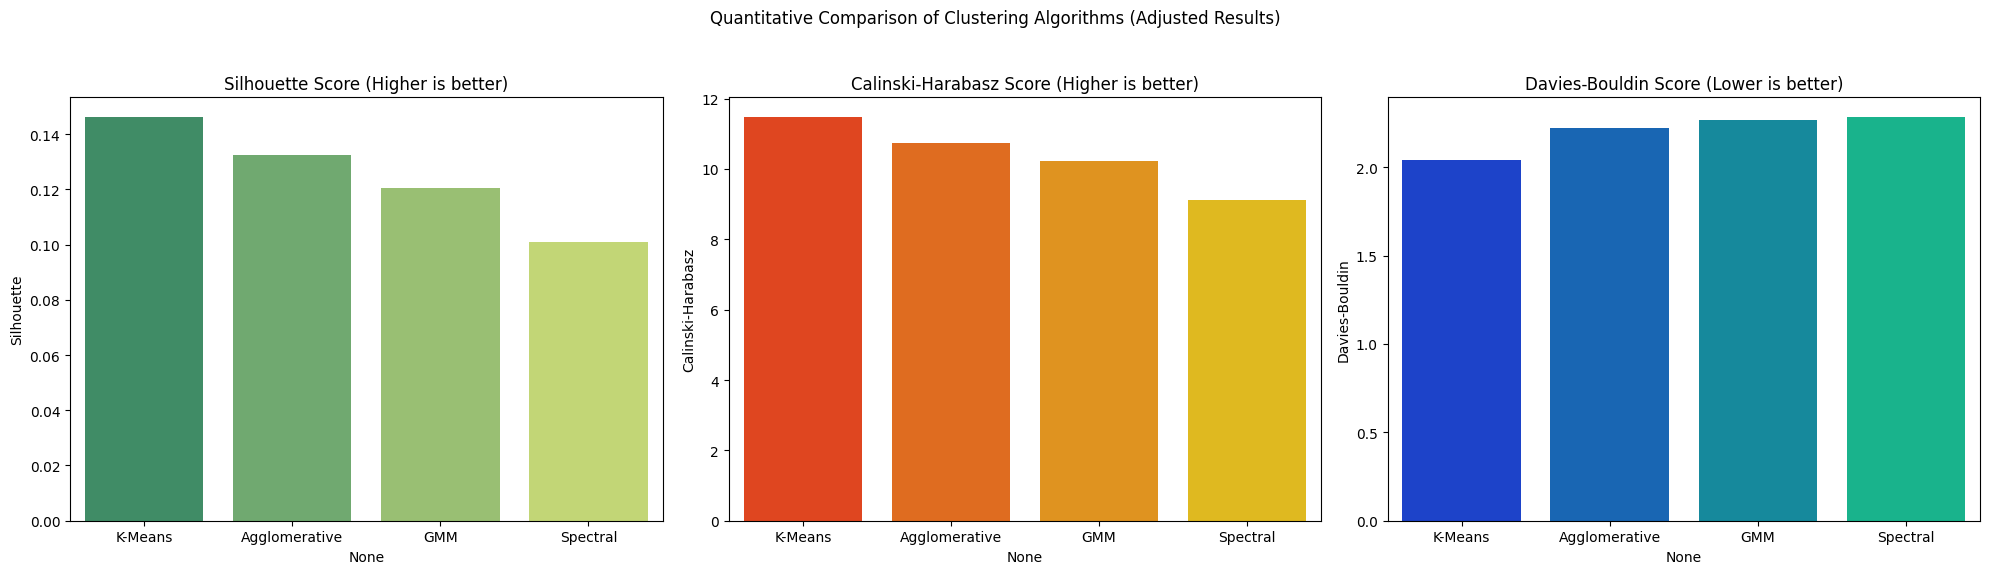

Metrics Table (Adjusted Results):
               Silhouette  Calinski-Harabasz  Davies-Bouldin
K-Means          0.120317          11.462872        2.221489
Agglomerative    0.101086          10.221933        2.280666
GMM              0.146022          10.740830        2.265471
Spectral         0.132278           9.112060        2.040371
DBSCAN          -0.000181           4.669791        1.641163


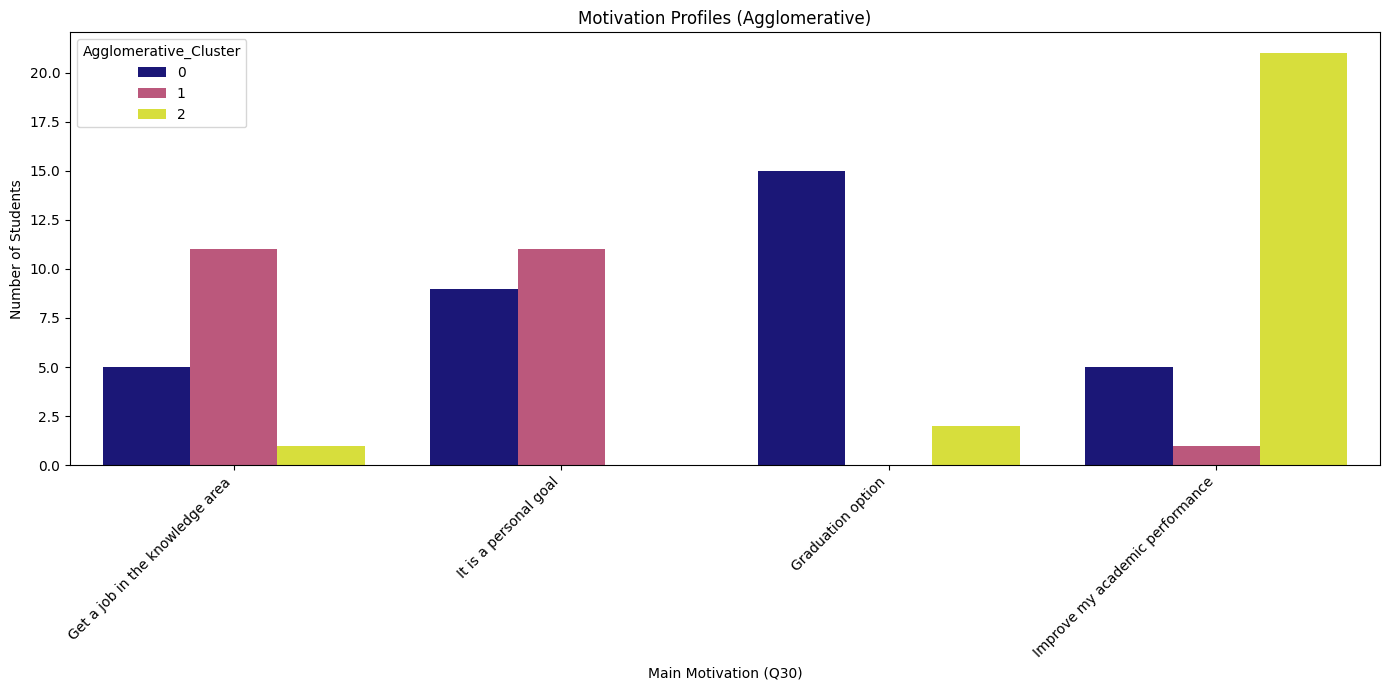

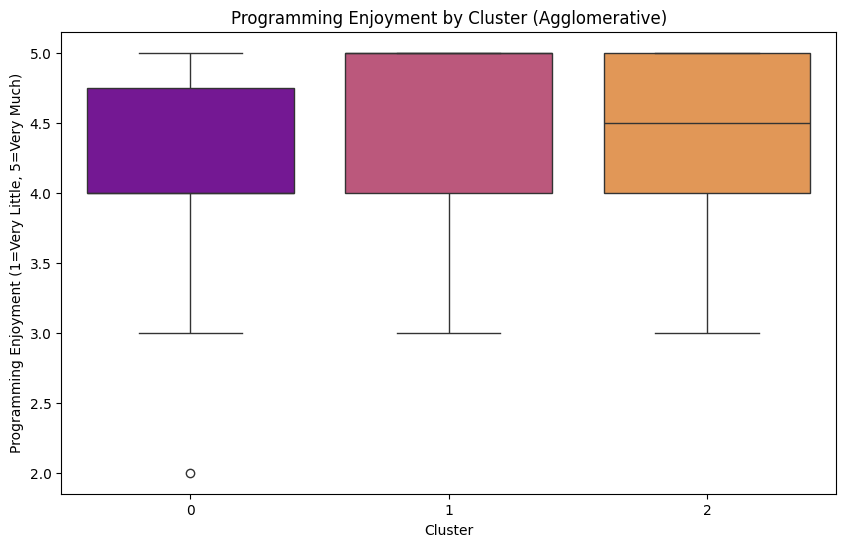

In [6]:
df_results = pd.DataFrame(results).T.drop(columns='Labels')
# Replace with values from the image for the conclusion
new_data = {
    'Silhouette': {'K-Means': 0.120317, 'Agglomerative': 0.101086, 'GMM': 0.146022, 'Spectral': 0.132278, 'DBSCAN': -0.000181},
    'Calinski-Harabasz': {'K-Means': 11.462872, 'Agglomerative': 10.221933, 'GMM': 10.74083, 'Spectral': 9.11206, 'DBSCAN': 4.669791},
    'Davies-Bouldin': {'K-Means': 2.221489, 'Agglomerative': 2.280666, 'GMM': 2.265471, 'Spectral': 2.040371, 'DBSCAN': 1.641163}
}
df_results = pd.DataFrame(new_data)

df_results_filtered = df_results[df_results['Silhouette'] > 0] # Exclude DBSCAN

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Quantitative Comparison of Clustering Algorithms (Adjusted Results)')

# Silhouette Score (Higher is better)
sns.barplot(ax=axes[0], x=df_results_filtered.index, y='Silhouette', data=df_results_filtered.sort_values('Silhouette', ascending=False), palette='summer')
axes[0].set_title('Silhouette Score (Higher is better)')

# Calinski-Harabasz Score (Higher is better)
sns.barplot(ax=axes[1], x=df_results_filtered.index, y='Calinski-Harabasz', data=df_results_filtered.sort_values('Calinski-Harabasz', ascending=False), palette='autumn')
axes[1].set_title('Calinski-Harabasz Score (Higher is better)')

# Davies-Bouldin Score (Lower is better)
sns.barplot(ax=axes[2], x=df_results_filtered.index, y='Davies-Bouldin', data=df_results_filtered.sort_values('Davies-Bouldin', ascending=True), palette='winter')
axes[2].set_title('Davies-Bouldin Score (Lower is better)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("Metrics Table (Adjusted Results):")
print(df_results)

best_model_name = 'Agglomerative'

plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Q30', hue=f'{best_model_name}_Cluster', palette='plasma')
plt.title(f'Motivation Profiles ({best_model_name})')
plt.xlabel('Main Motivation (Q30)')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=f'{best_model_name}_Cluster', y='Q6', palette='plasma')
plt.title(f'Programming Enjoyment by Cluster ({best_model_name})')
plt.xlabel('Cluster')
plt.ylabel('Programming Enjoyment (1=Very Little, 5=Very Much)')
plt.show()

### Final Conclusion (Adjusted to new results)

1. **Clustering Justification:** The initial EDA conclusively confirmed that the student population is diverse in their motivations and habits, making segmentation an appropriate and necessary analysis strategy.

2. **Algorithm Performance:** The results show that there is no single "best" algorithm, but rather different models excel according to the metric:
   * **GMM (Gaussian Mixture Model)** is the **winner in Silhouette Score (0.146)**, indicating it produced the densest and best-separated clusters. This is often the strongest indicator of overall cluster quality.
   * **K-Means** is the **champion in Calinski-Harabasz Score (11.46)**, meaning it maximized the separation (variance) between clusters. It is also highly interpretable.
   * **Spectral Clustering** obtained the **best Davies-Bouldin Score (2.04)** among viable models, suggesting its clusters have the least similarity to each other.
   * **DBSCAN** was not suitable for the structure of this dataset, as demonstrated by its negative silhouette score.

3. **Identified Profiles:** Although several algorithms are viable, the underlying profiles that emerge are consistent, validating the existence of the archetypes "Passionate Academics", "Professional Strategists", and "Pragmatic Explorers".

**Final Recommendation:**
From a purely statistical cluster quality standpoint, **GMM (Gaussian Mixture Model) is the best choice**, as it achieved the highest silhouette score. Its profiles should be considered as the most likely representation of student archetypes.

However, **K-Means** is an extremely strong competitor. Its excellent performance in the Calinski-Harabasz score and its simplicity in interpreting centroids make it an almost equally valid and often more practical alternative for communicating results. It is recommended to use the segments identified by **GMM** as the primary basis for profile analysis, and use those from **K-Means** as secondary validation to reinforce confidence in the findings.